<a href="https://colab.research.google.com/github/jcl347/PyTorch-Deep-Learning-and-Artificial-Intelligence/blob/main/LP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [4]:
# load the data
data = load_breast_cancer()

In [5]:
# check the type of 'data'
type(data)

sklearn.utils._bunch.Bunch

In [6]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [8]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [11]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [15]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Now all the fun PyTorch stuff
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [17]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [18]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [19]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.3646, Test Loss: 0.3694
Epoch 100/1000, Train Loss: 0.2766, Test Loss: 0.2866
Epoch 150/1000, Train Loss: 0.2268, Test Loss: 0.2393
Epoch 200/1000, Train Loss: 0.1944, Test Loss: 0.2089
Epoch 250/1000, Train Loss: 0.1717, Test Loss: 0.1881
Epoch 300/1000, Train Loss: 0.1550, Test Loss: 0.1731
Epoch 350/1000, Train Loss: 0.1421, Test Loss: 0.1617
Epoch 400/1000, Train Loss: 0.1318, Test Loss: 0.1529
Epoch 450/1000, Train Loss: 0.1235, Test Loss: 0.1458
Epoch 500/1000, Train Loss: 0.1165, Test Loss: 0.1399
Epoch 550/1000, Train Loss: 0.1106, Test Loss: 0.1351
Epoch 600/1000, Train Loss: 0.1055, Test Loss: 0.1310
Epoch 650/1000, Train Loss: 0.1010, Test Loss: 0.1275
Epoch 700/1000, Train Loss: 0.0971, Test Loss: 0.1245
Epoch 750/1000, Train Loss: 0.0937, Test Loss: 0.1219
Epoch 800/1000, Train Loss: 0.0905, Test Loss: 0.1196
Epoch 850/1000, Train Loss: 0.0877, Test Loss: 0.1176
Epoch 900/1000, Train Loss: 0.0852, Test Loss: 0.1158
Epoch 950/1000, Train Loss: 0

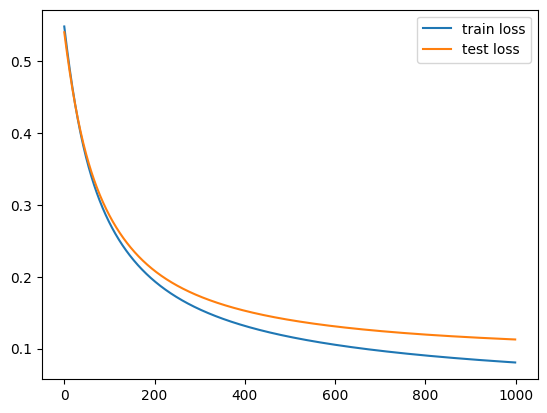

In [20]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [21]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9843, Test acc: 0.9681


In [22]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2298, -0.2942, -0.3319, -0.4482, -0.2877, -0.0500, -0.2120, -0.5197,
                       -0.1024,  0.5201, -0.5052, -0.1524, -0.5130, -0.2153,  0.1747,  0.1855,
                        0.0600, -0.1535,  0.2823,  0.5332, -0.5171, -0.4814, -0.3464, -0.5324,
                       -0.3138, -0.3007, -0.4431, -0.3417, -0.5276, -0.3161]])),
             ('0.bias', tensor([0.4848]))])

In [23]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [24]:
!ls

mymodel.pt  sample_data


In [25]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))


<All keys matched successfully>

In [26]:
# Evaluate the new model
# Results should be the same!
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9843, Test acc: 0.9681


In [27]:
# Download the model
from google.colab import files
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>